 US 611: URBAN LAB MODULE 4 - Final submission 

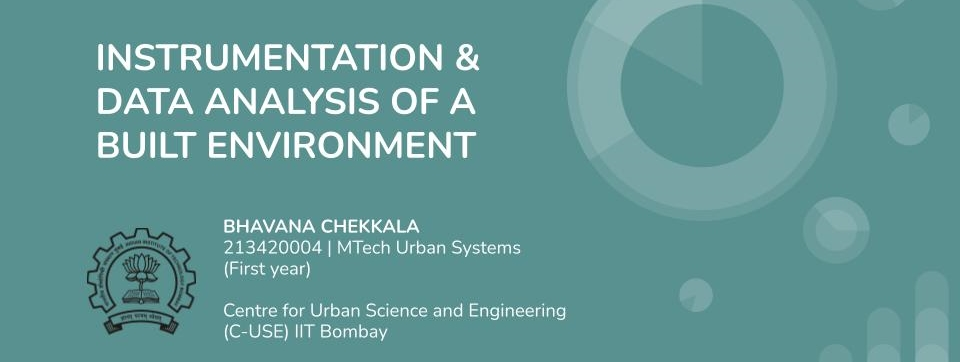
<br/>


------
## Introduction

<br/>
This notebook is a compilation of the work done during the course of US 611 lab - Module 4.

<font size = 3><strong>The structure of the exercise is  such as;</strong></font>
* **Measurements in the built environment** - To meausre Thermal comfort accounting for Indoor environment quality (IEQ)
* **Instruments** - Environmental monitoring system 
* **Basics of Programming in Python** 
* **Data handling & data analysis**

<br/>
<font size = 3><strong>Plotting libraries used;</strong></font>

* **Matplotlib** is the standard plotting library
* **Seaborn** is the a beautiful version of matplotlib

<br/>
<font size = 3><strong>Data Analysis performed in following ways ;</strong></font>

* **Ploting** - Time series plots for few variables, Scatter plots and Subplots for all variables
* **Correlation** - Matrix and pair plots for all variables 


------
## Importing libraries & Installing extensions 


In [1]:
import numpy as np #importing numpy library 

In [2]:
import pandas as pd #importing pandas library 

In [3]:
pip install jupyter_contrib_nbextensions #installing jupyter contribution extension through pip  

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#installing'


In [4]:
conda install -c conda-forge jupyter_contrib_nbextensions #installing jupyter contribution extension through conda 


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: jupyter_contrib_nbextensions #installing jupyter contribution extension through conda


------
## Methodology 

<br/>


### Instrumentation
Data collected for Thermal comfort Environmental factors such as:
* Air temperature
- Mean radiant temperature
- Air speed
- Relative humidity

The Environmental monitoring system consists of following instruments and corresponding data was obtained: 

<br/>

* **Testo Turbulence Sensor/Probe** <br> *Air velocity and air temperature* <br> m/s (Vel), °C (Temp A)
<br/>
* **Lux probe** <br> *measuring illuminance* <br> lx (Illum)
* **CO₂ probe** <br> *CO₂ concentration, humidity and air temperature in indoor areas* <br> ppm (CO2), % (Rel humidity),°C (Temp B)
<br/>
* **Testo 480 Data logger**<br> *Measurements and data logging*
        
<br/>

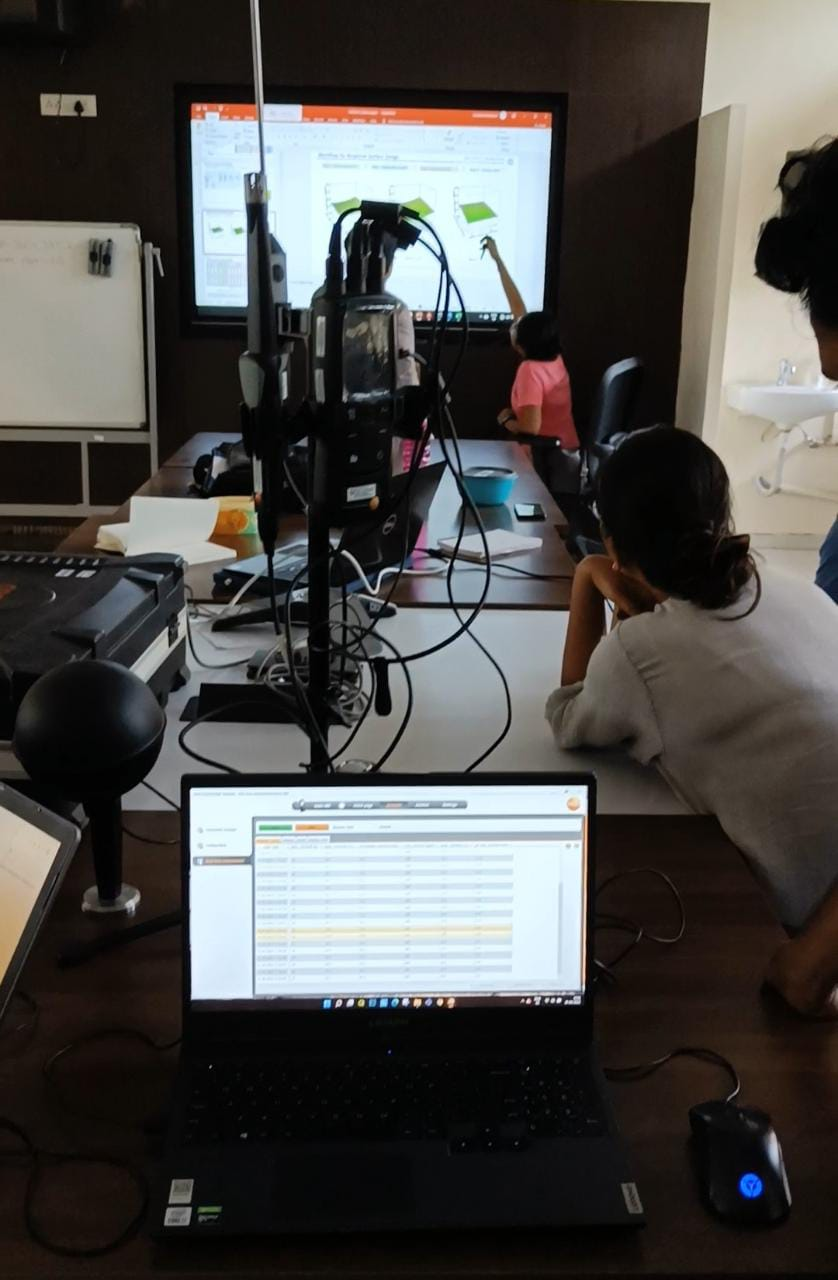
Image showing the environment and position of the instrument during the reading
<br/>
### Data collection 

* **Location** - Urban Studio, CUSE department building, Second Floor
* **Date and time**- 1st April 2022 17.00 to 18.14 hours 
* **Internal environment setup - while starting the reading** <br> The urban studio consisted of 6-7 people sitting sround the table <br> 4 out of 9 windows were open and door was open <br> All the fans were on and were switched off all together after half hour <br> no lights were on and TV was on for first half hour   
<br/>

<blockquote> Readings were fed in the Testo software application and results obtained in excel format for 4243 rows × 8 columns. The output file exported as xls file amd further imported as reading data frame.   


------
## Importing Data

In [5]:
import os

In [6]:
pwdir = os.getcwd() #present and current working directory 

In [7]:
print(os.getcwd()) #checking for path 

C:\Users\BHAVANA CHEKKALA


In [8]:
df = pd.read_excel(pwdir+'/Bhavana_Lab_results.xls') #Dataframe reading excel file 

WARNING *** file size (684560) not 512 + multiple of sector size (512)


In [9]:
df

,Date / time,SecRuntime,lx illum._3123446,°C temp._3181576,%rH rel humidity_3181576,ppm CO2_3181576,°C temp._3216382,m/s vel. flow_3216382
0,01-04-2022 17:03:23,0,32,32.700001,52.299999,586,33.400002,0.06
1,01-04-2022 17:03:24,1,32,32.700001,52.299999,589,33.400002,0.06
2,01-04-2022 17:03:25,2,32,32.700001,52.299999,589,33.400002,0.11
3,01-04-2022 17:03:26,3,35,32.700001,52.299999,589,33.400002,0.11
4,01-04-2022 17:03:27,4,34,32.700001,52.299999,590,33.400002,0.10
...,...,...,...,...,...,...,...,...
4238,01-04-2022 18:14:01,4238,30,33.099998,53.000000,490,34.099998,0.02
4239,01-04-2022 18:14:02,4239,30,33.099998,53.000000,490,34.099998,0.02
4240,01-04-2022 18:14:03,4240,30,33.099998,53.000000,491,34.099998,0.02
4241,01-04-2022 18:14:04,4241,30,33.099998,53.000000,491,34.099998,0.02


In [10]:
df.columns

Index(['Date / time', 'SecRuntime', 'lx illum._3123446', '°C temp._3181576',
       '%rH rel humidity_3181576', 'ppm CO2_3181576', '°C temp._3216382',
       'm/s vel. flow_3216382'],
      dtype='object')

In [11]:
df.rename(columns={'SecRuntime':'Runtime (seconds)', 'lx illum._3123446':'Illumination (lux)', '°C temp._3216382':'Indoor_temperature_A (°C)',
       'm/s vel. flow_3216382':'Air Velocity (m/s)', '°C temp._3181576':'Indoor_temperature_B (°C)', '%rH rel humidity_3181576':'Relative Humidity (%)',
       'ppm CO2_3181576': 'CO2 concentration (ppm)'}, inplace=True)

### Existing datetime is in string form, so converting it into a **datetime object** to perform analysis:

#### 1. Importing date time library  

In [12]:
from datetime import datetime   
datetime_object = datetime.strptime('April 5 2022  3:20PM', '%B %d %Y %I:%M%p')
datetime_object

datetime.datetime(2022, 4, 5, 15, 20)

#### 2. Introducing date_time column in the data frame

In [13]:
df['Date_time']=np.zeros(len(df))     

In [14]:
for i in np.arange(len(df)):
    df['Date_time'][i] = datetime.strptime(df['Date / time'][i], '%d-%m-%Y %H:%M:%S')

C:\Users\BHAVAN~1\AppData\Local\Temp/ipykernel_25764/175325914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_time'][i] = datetime.strptime(df['Date / time'][i], '%d-%m-%Y %H:%M:%S')


In [15]:
df 

,Date / time,Runtime (seconds),Illumination (lux),Indoor_temperature_B (°C),Relative Humidity (%),CO2 concentration (ppm),Indoor_temperature_A (°C),Air Velocity (m/s),Date_time
0,01-04-2022 17:03:23,0,32,32.700001,52.299999,586,33.400002,0.06,2022-04-01 17:03:23
1,01-04-2022 17:03:24,1,32,32.700001,52.299999,589,33.400002,0.06,2022-04-01 17:03:24
2,01-04-2022 17:03:25,2,32,32.700001,52.299999,589,33.400002,0.11,2022-04-01 17:03:25
3,01-04-2022 17:03:26,3,35,32.700001,52.299999,589,33.400002,0.11,2022-04-01 17:03:26
4,01-04-2022 17:03:27,4,34,32.700001,52.299999,590,33.400002,0.10,2022-04-01 17:03:27
...,...,...,...,...,...,...,...,...,...
4238,01-04-2022 18:14:01,4238,30,33.099998,53.000000,490,34.099998,0.02,2022-04-01 18:14:01
4239,01-04-2022 18:14:02,4239,30,33.099998,53.000000,490,34.099998,0.02,2022-04-01 18:14:02
4240,01-04-2022 18:14:03,4240,30,33.099998,53.000000,491,34.099998,0.02,2022-04-01 18:14:03
4241,01-04-2022 18:14:04,4241,30,33.099998,53.000000,491,34.099998,0.02,2022-04-01 18:14:04


#### 3. Checking if date time change worked: Timedelta (difference)

In [16]:
df['Date_time'][50] - df['Date_time'][20]

datetime.timedelta(seconds=30)

------
##  Plotting 

### Matplot

In [34]:
#import matplot library
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 150

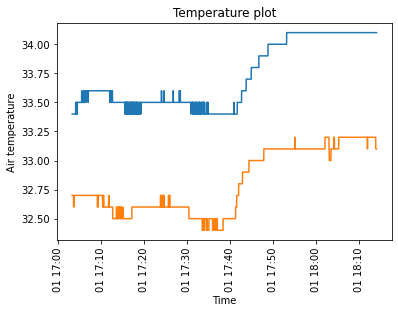

In [18]:
plt.plot(df['Date_time'],df['Indoor_temperature_A (°C)']);
plt.plot(df['Date_time'],df['Indoor_temperature_B (°C)']);

# Assigning attributes
plt.xlabel("Time")  # adding X-axis label
plt.ylabel("Air temperature")  # adding Y-axis label
plt.title("Temperature plot");  # adding title
plt.xticks(rotation = 90);

### Seaborn

Index(['Date / time', 'Runtime (seconds)', 'Illumination (lux)',
       'Indoor_temperature_B (°C)', 'Relative Humidity (%)',
       'CO2 concentration (ppm)', 'Indoor_temperature_A (°C)',
       'Air Velocity (m/s)', 'Date_time'],
      dtype='object')

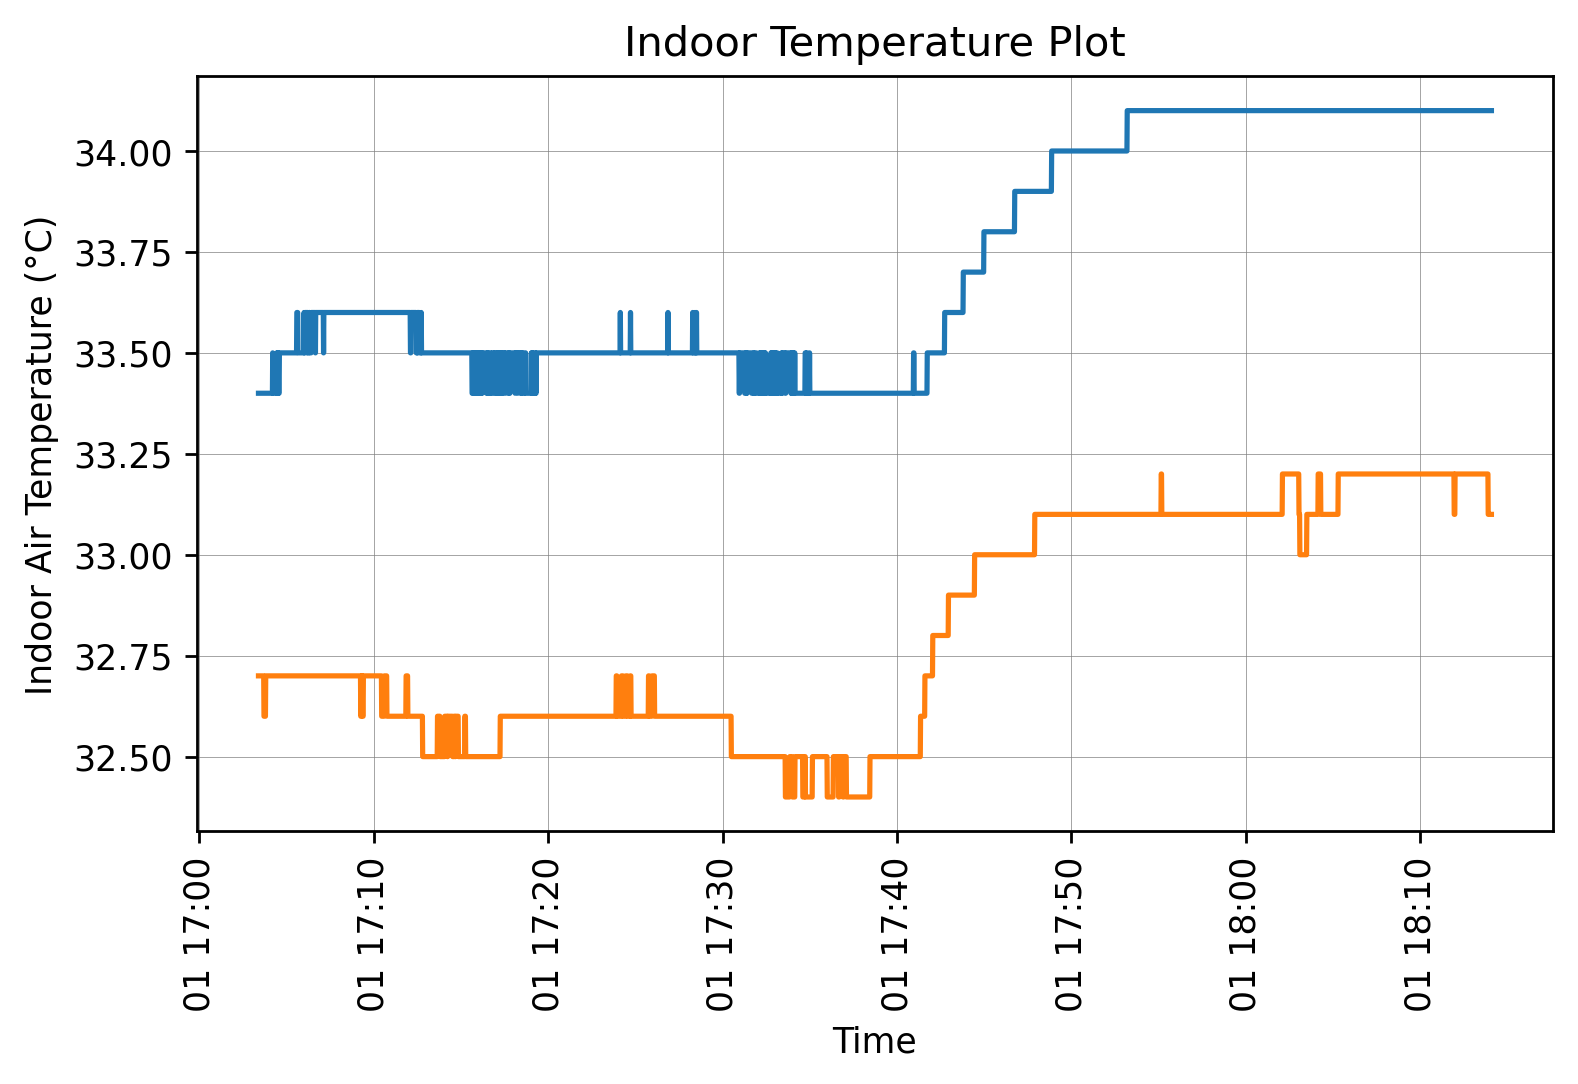

In [19]:
import seaborn as sns #import seaborn

fig = plt.figure(figsize=(7,4), dpi=250)

sns.lineplot(data = df, x = 'Date_time', y = 'Indoor_temperature_A (°C)')

sns.lineplot(data = df, x = 'Date_time', y = 'Indoor_temperature_B (°C)')

# Assigning attributes
plt.xlabel("Time")  # add X-axis label
plt.ylabel("Indoor Air Temperature (°C)")  # add Y-axis label
plt.title("Indoor Temperature Plot");  # add title
plt.xticks(rotation = 90);

#plt.grid()
plt.grid(color='grey', linewidth=.2)

df.columns

<div class = "alert alert-block alert-info"> <b> INFERENCES: There exist 2 temperture data feeds form CO2 probe and Testo turbulence sensor and 1 degree difference have occured due to some instrument callibration error. <br> The temperature rise curve is a result of switching off the fans as people evacuated from the studio post presentation and discussion meeting.<b/> </div> 

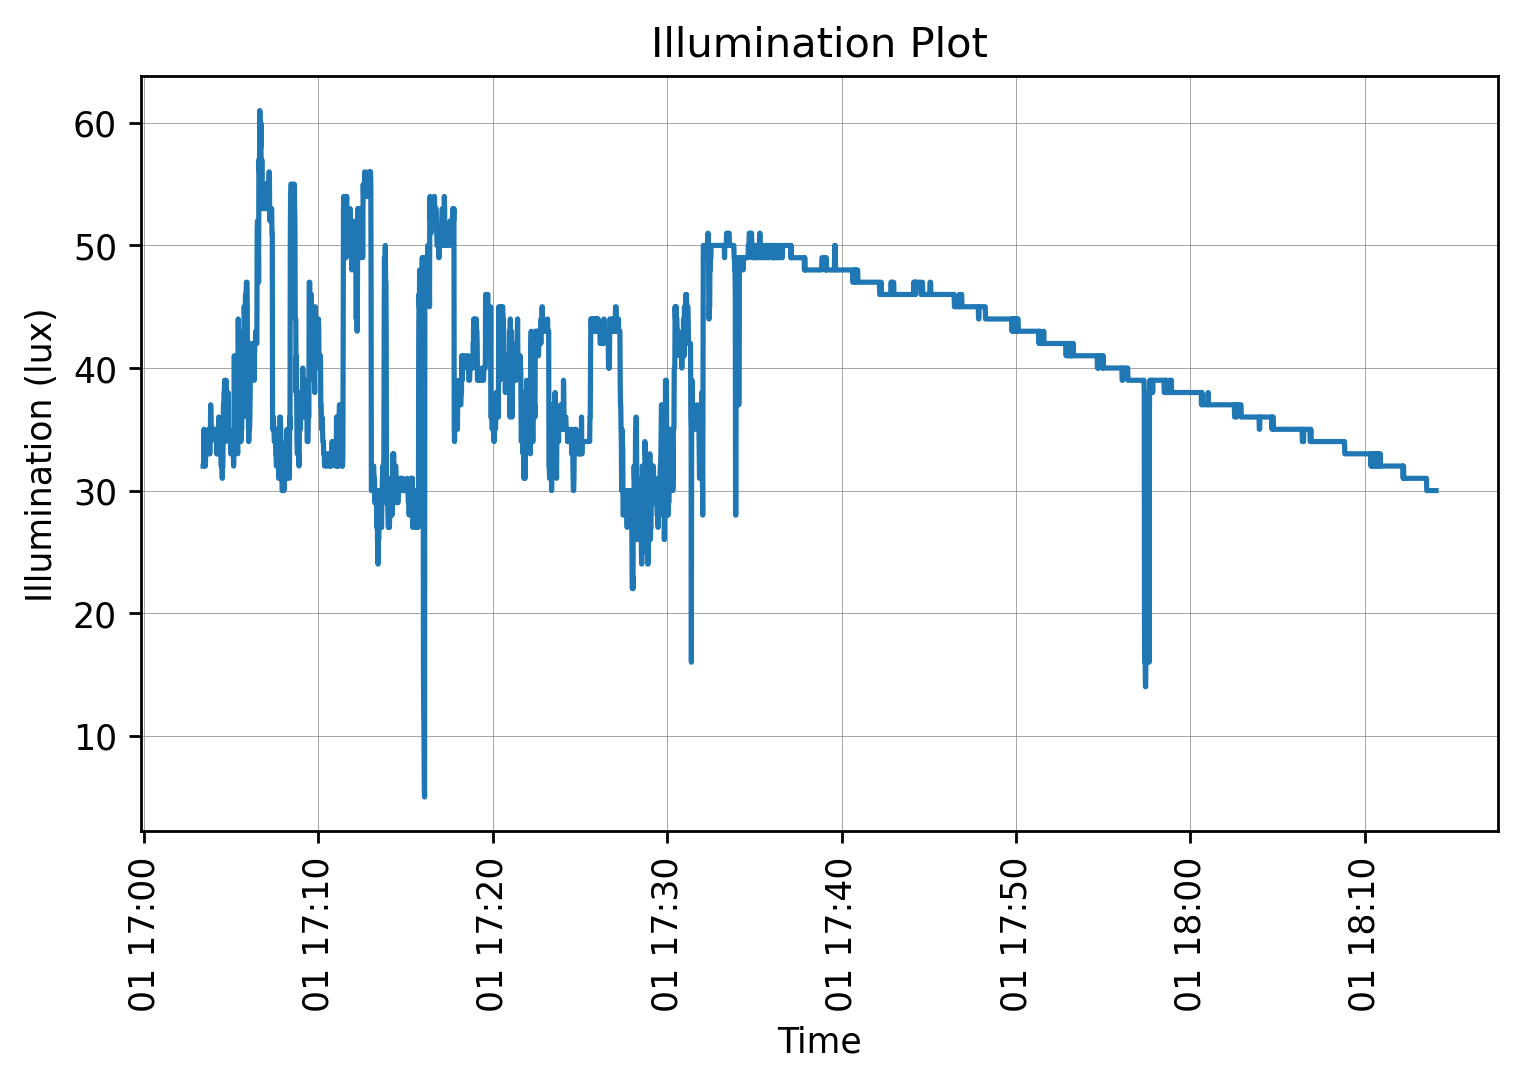

In [20]:
fig = plt.figure(figsize=(7,4), dpi=250)

sns.lineplot(data = df, x = 'Date_time', y = 'Illumination (lux)')
# Assigning attributes
plt.xlabel("Time")  # add X-axis label
plt.ylabel("Illumination (lux)")  # add Y-axis label
plt.title("Illumination Plot");  # add title
plt.xticks(rotation = 90);

#plt.grid()
plt.grid(color='grey', linewidth=.2)

<div class = "alert alert-block alert-info"> <b> INFERENCES: The declining curve (at 17.40) is a result of switching off the TV as people evacuated from the studio <br> Fluctuation in the first half (before 17.40) shows fluctuation of light emmitance from the TV while presentation as well as movement of people hindering the face of lux meter. <br> The steady dip once people left the room, indicates natural decay and human induced events are null unless the one dip explained before.  <b/> </div> 

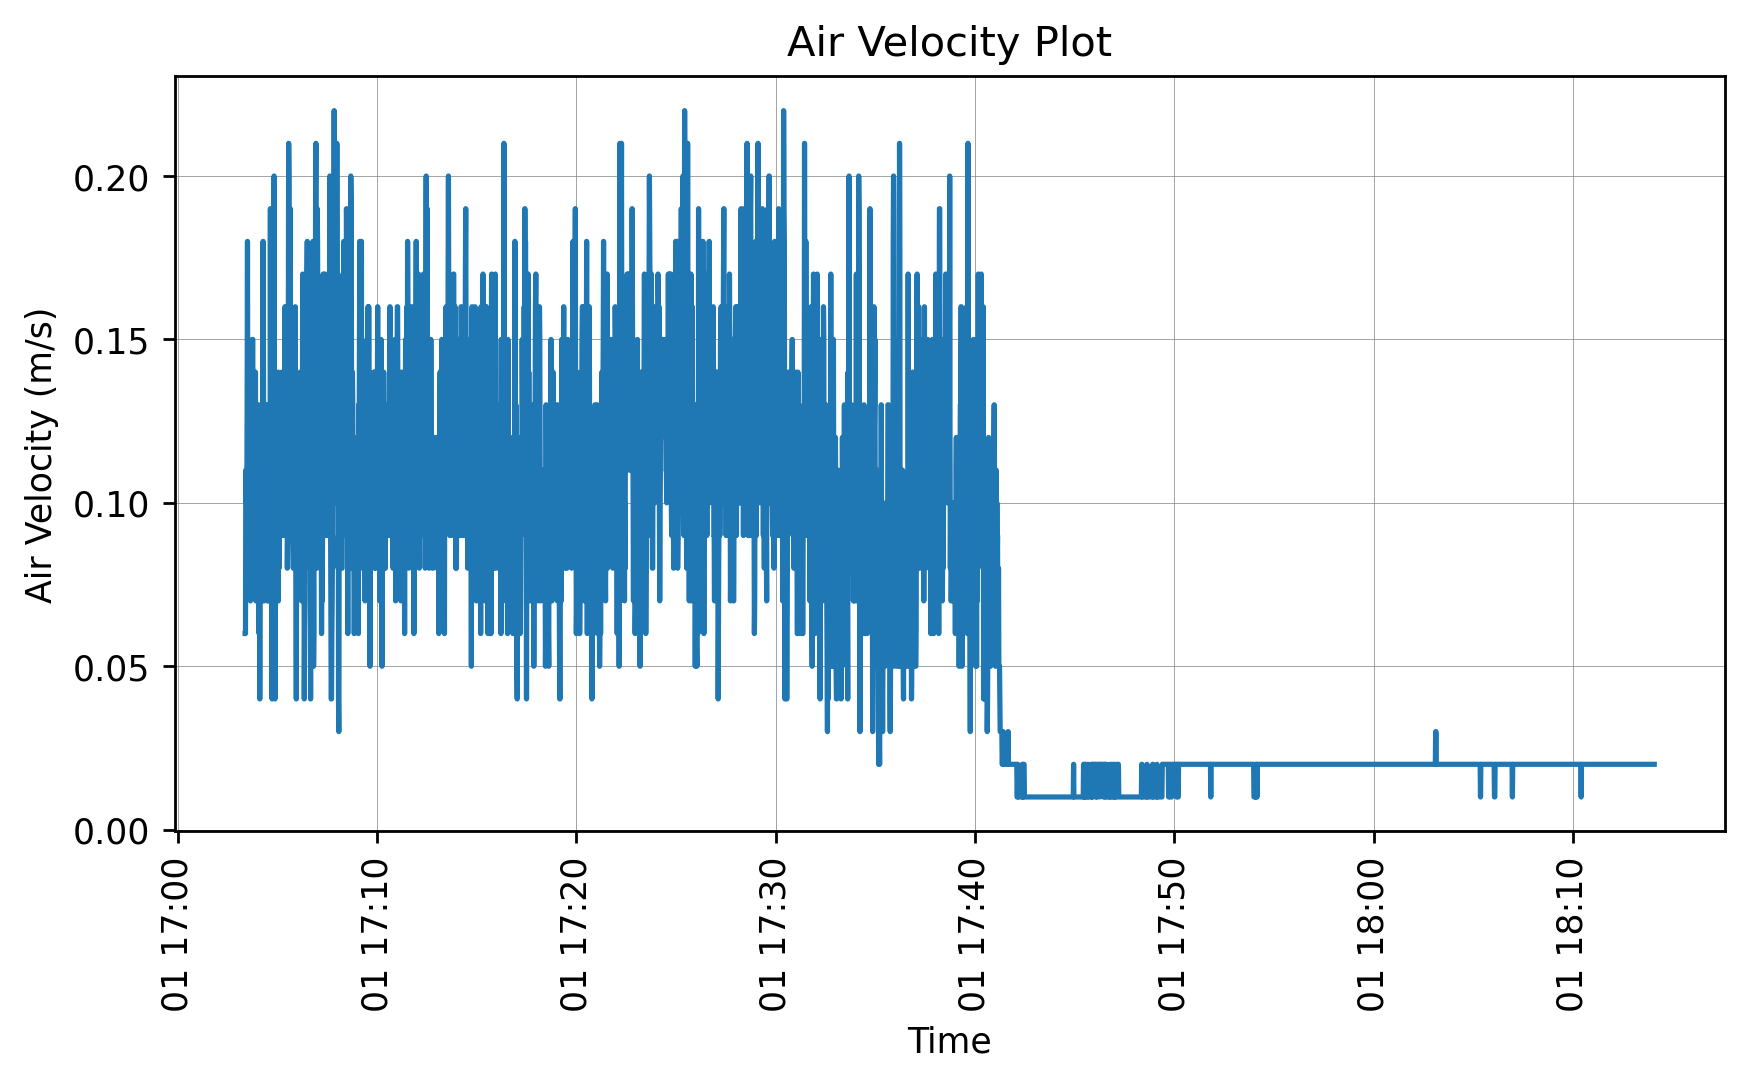

In [21]:
fig = plt.figure(figsize=(8,4), dpi=250)

sns.lineplot(data = df, x = 'Date_time', y = 'Air Velocity (m/s)')
# Assigning attributes
plt.xlabel("Time")  # add X-axis label
plt.ylabel("Air Velocity (m/s)")  # add Y-axis label
plt.title('Air Velocity Plot');  # add title
plt.xticks(rotation = 90);

#plt.grid()
plt.grid(color='grey', linewidth=.2)

<div class = "alert alert-block alert-info"> <b> INFERENCES: The high fluctuation in the plot is due to the proximity of turbulence probe to the fan as the setup was placed on the table.<br> The velocity decline curve (at 17.40) is a result of switching off the fans as people evacuated from the studio.<b/> </div> 

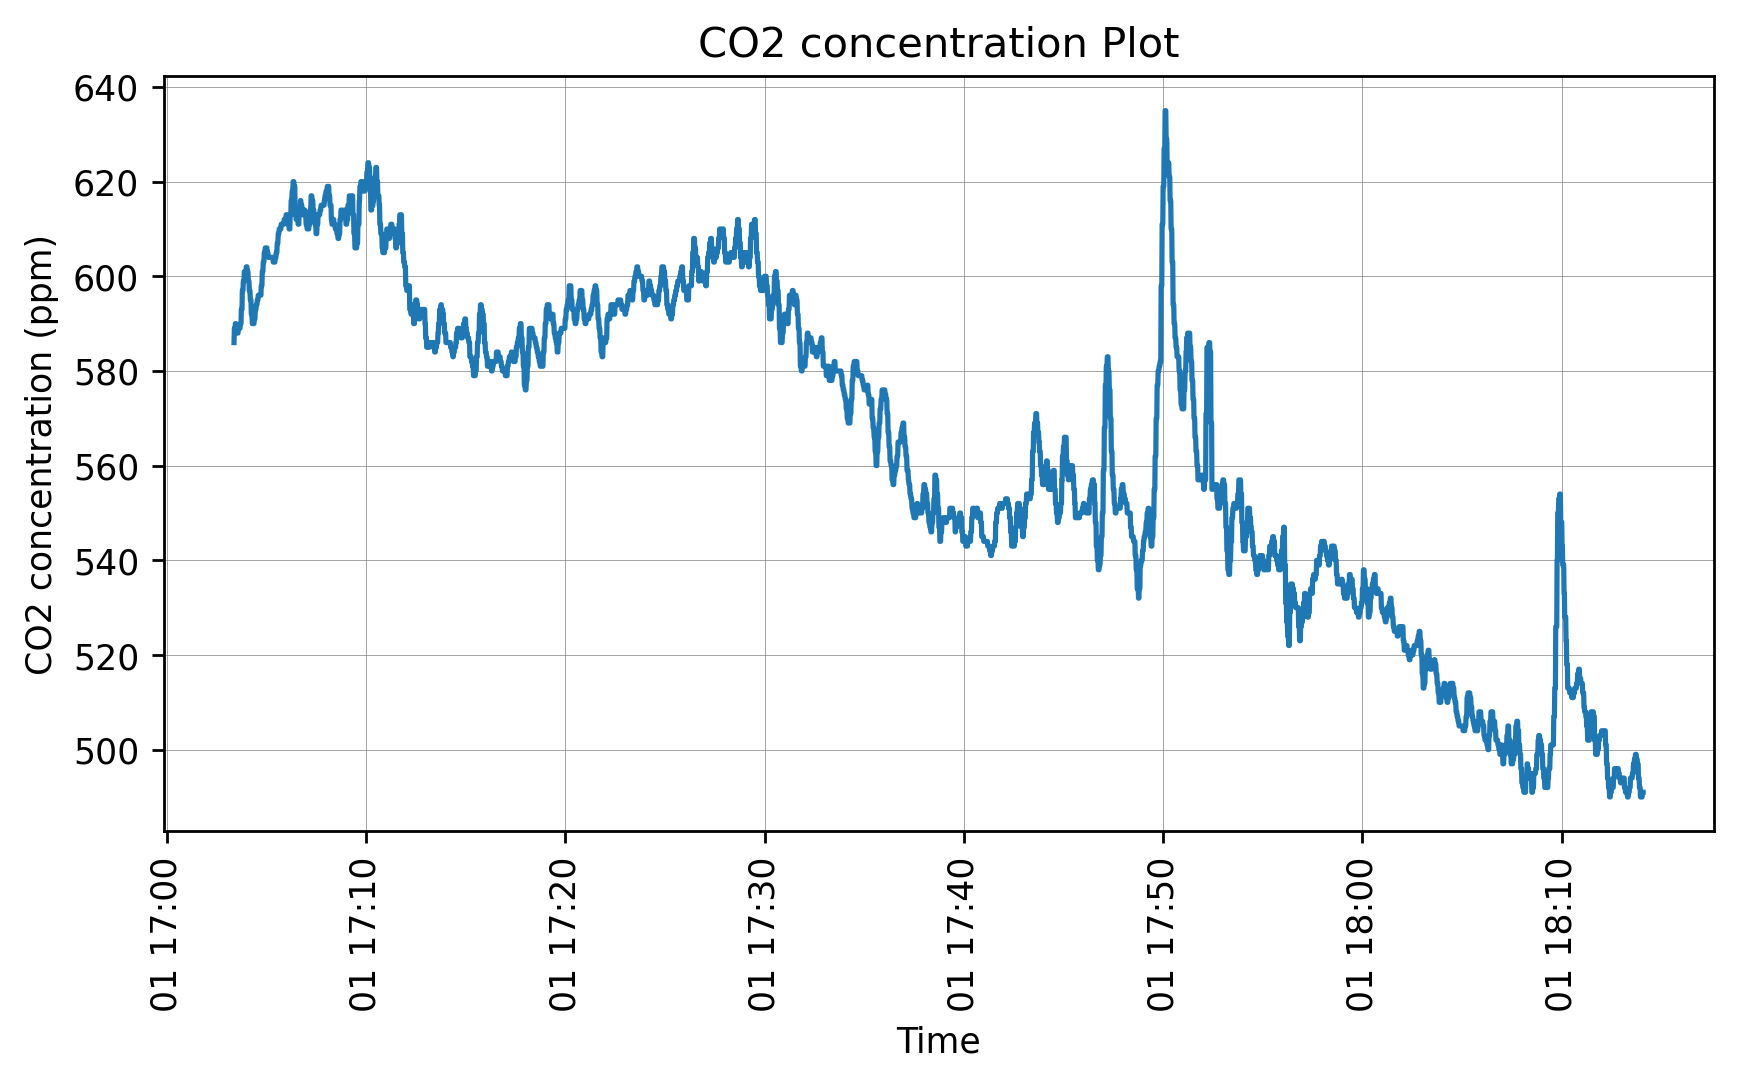

In [22]:
fig = plt.figure(figsize=(8,4), dpi=250)

sns.lineplot(data = df, x = 'Date_time', y = 'CO2 concentration (ppm)')
# Assigning attributes
plt.xlabel("Time")  # add X-axis label
plt.ylabel("CO2 concentration (ppm)")  # add Y-axis label
plt.title('CO2 concentration Plot');  # add title
plt.xticks(rotation = 90);

#plt.grid()
plt.grid(color='grey', linewidth=.2)

<div class = "alert alert-block alert-info"> <b> INFERENCES: The co2 decline curve is a result of switching off the fans as people evacuated from the studio. The break peaks in the second half is result obtained as i opened the door and came to check the readings being taken. <b/> </div>
    

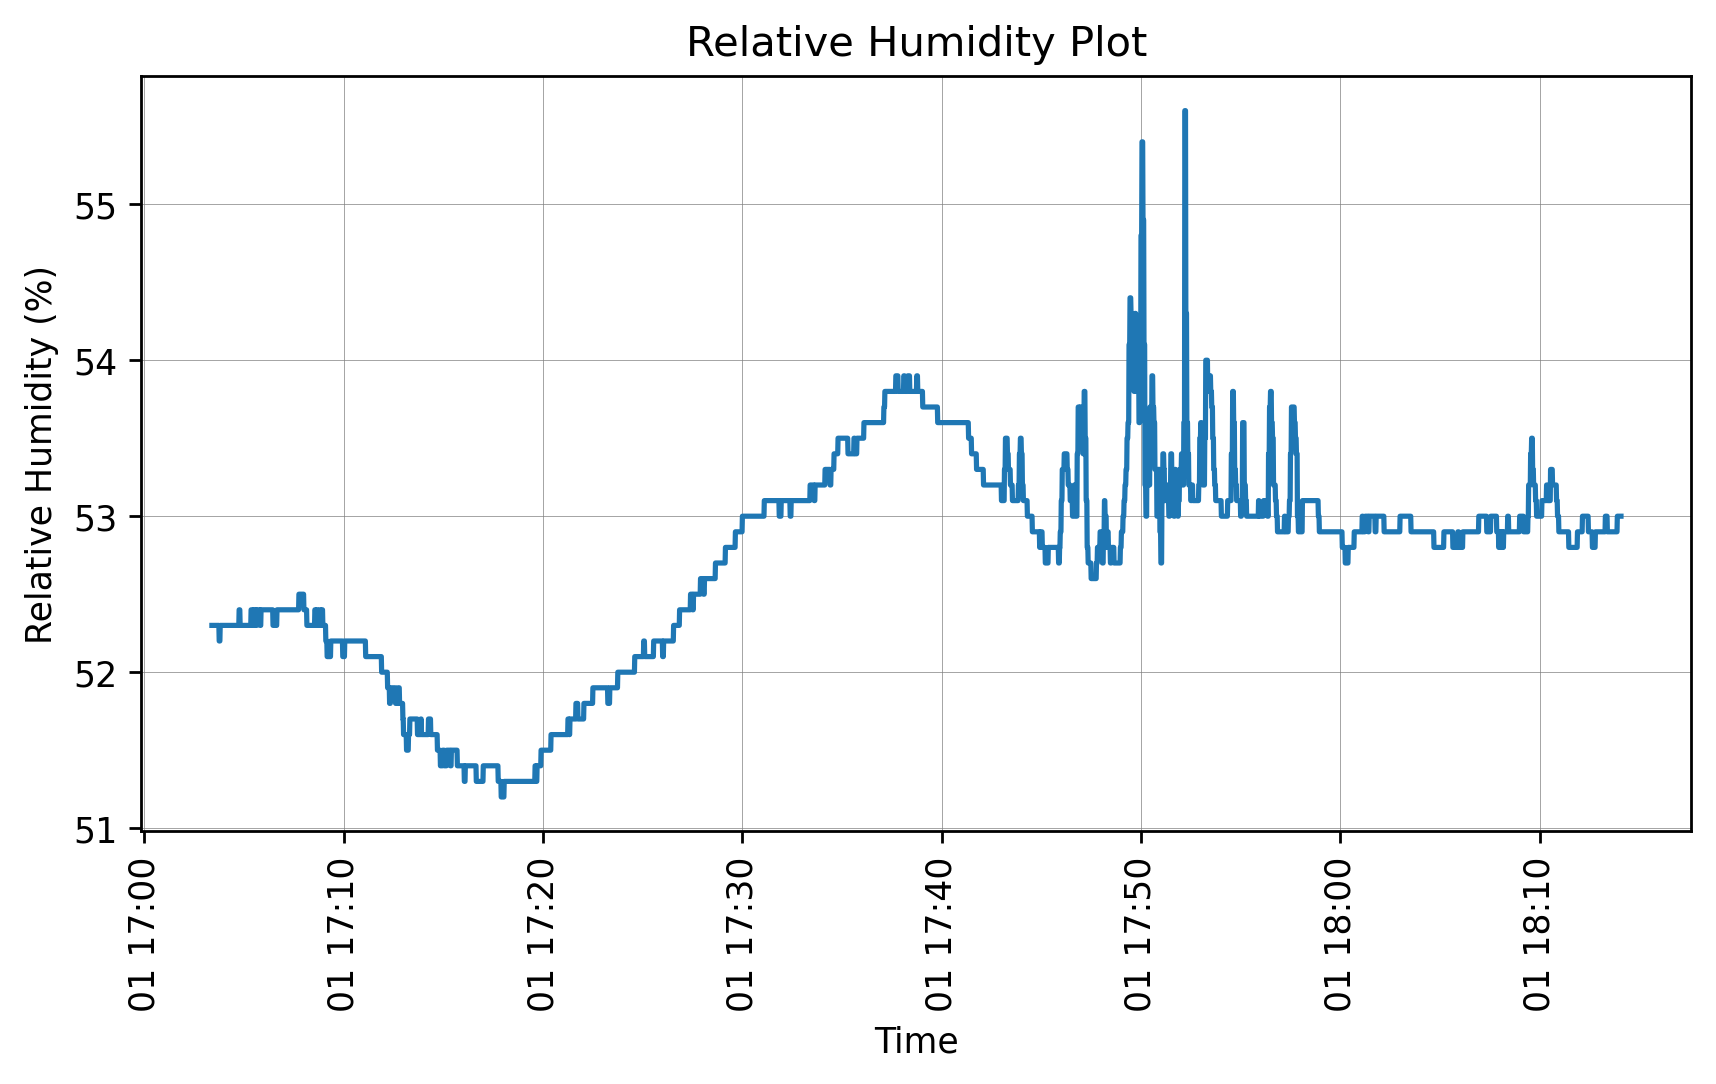

In [23]:
fig = plt.figure(figsize=(8,4), dpi=250)

sns.lineplot(data = df, x = 'Date_time', y = 'Relative Humidity (%)')
# Assigning attributes
plt.xlabel("Time")  # add X-axis label
plt.ylabel("Relative Humidity (%)")  # add Y-axis label
plt.title('Relative Humidity Plot');  # add title
plt.xticks(rotation = 90);

#plt.grid()
plt.grid(color='grey', linewidth=.2)

<div class = "alert alert-block alert-info"> <b> INFERENCES: The sag curve (before 17.40) is a result of people presemnt in the room and moving arond.<br> The curve subsequently flattens as people leave the room and the peaks (after 17.40) is result obtained the door was opened. <b/> </div>

---
## Descriptive analysis 

In [30]:
df.describe()

,Runtime (seconds),Illumination (lux),Indoor_temperature_B (°C),Relative Humidity (%),CO2 concentration (ppm),Indoor_temperature_A (°C),Air Velocity (m/s)
count,4243.000000,4243.000000,4243.000000,4243.000000,4243.000000,4243.000000,4243.000000
mean,2121.000000,40.108885,32.813905,52.722649,563.744992,33.724841,0.067867
std,1224.992925,7.030708,0.275676,0.686605,35.868027,0.285679,0.053058
min,0.000000,5.000000,32.400002,51.200001,490.000000,33.400002,0.010000
25%,1060.500000,34.000000,32.599998,52.299999,539.000000,33.500000,0.020000
50%,2121.000000,40.000000,32.700001,52.900002,568.000000,33.599998,0.060000
75%,3181.500000,46.000000,33.099998,53.099998,594.000000,34.099998,0.110000
max,4242.000000,61.000000,33.200001,55.599998,635.000000,34.099998,0.220000


---
## Correlation

### Matplot Subplots 
Based on Matplotpy library: for loops on X and y axes  

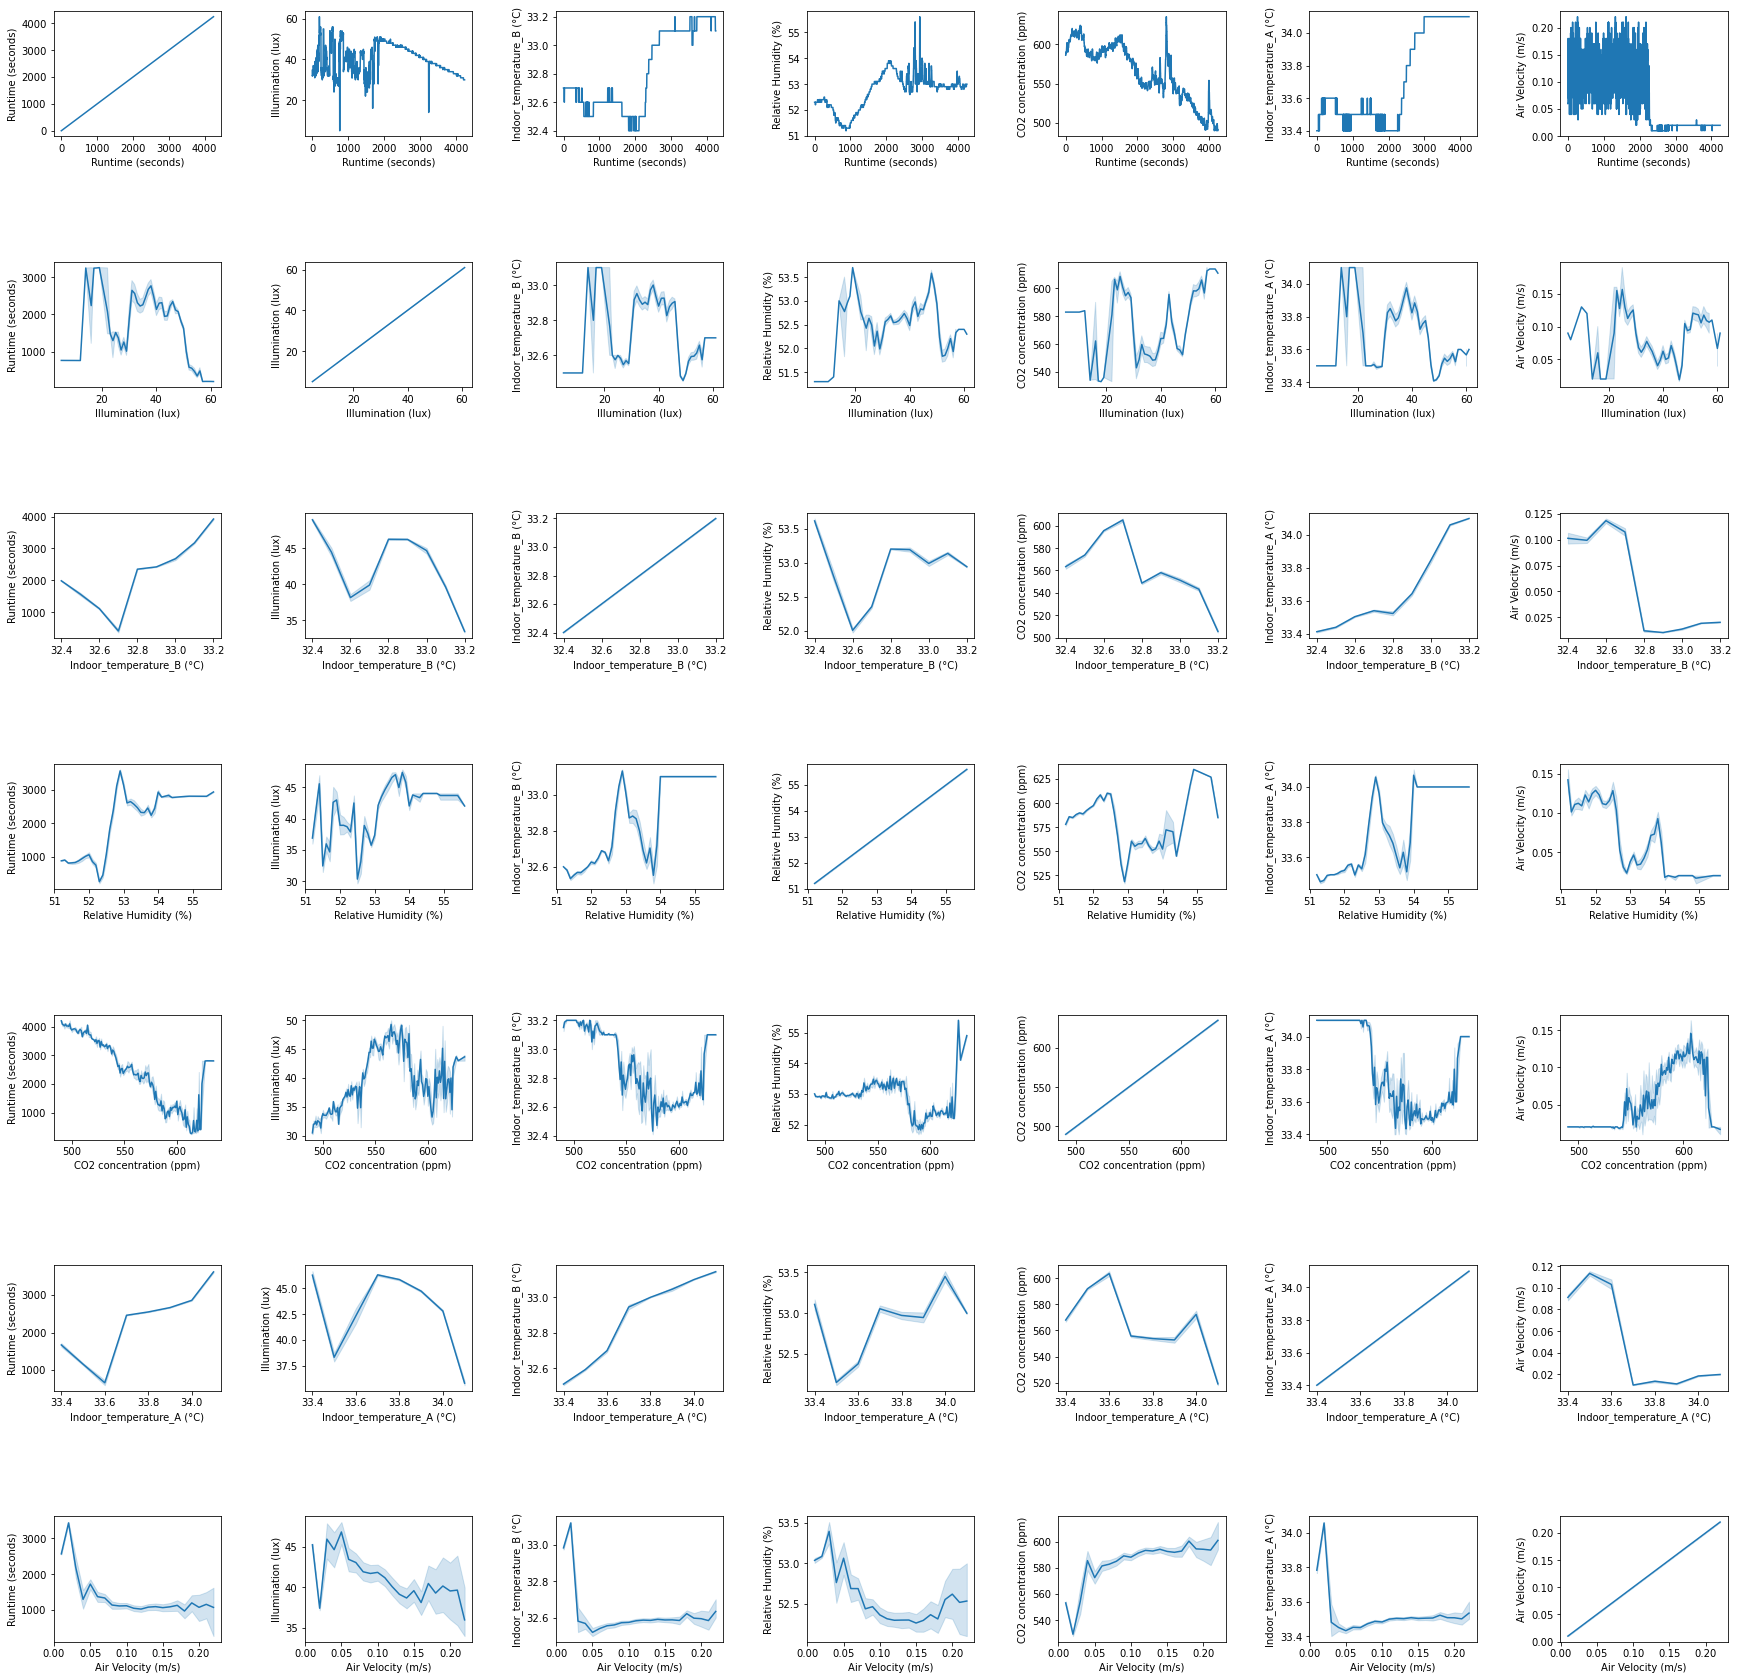

In [32]:
fig, axes = plt.subplots(nrows=7, ncols=7, figsize=(30,30))
fig.subplots_adjust(hspace = 1, wspace=.5)

k=df.columns
for i in range(1,8):
    for j in range(1,8):
        sns.lineplot(data = df, x = k[i], y = k[j], palette = 'Spectral', ax = axes[i-1,j-1])

<div class = "alert alert-block alert-info"> <b> INFERENCES: The linear graphs obtained show clear understanding between the relationship of variables as follows: <br>Negative relation curve between CO2 concentration and temperatutre (col=5 row=3). <br> Positive relation curve between the indoor temperatures A and B.<br> 45 degree line between self correlated variables (col=1 row=1).<b/> </div>

### Correlation Matrix: Seaborn
Between all seven variables

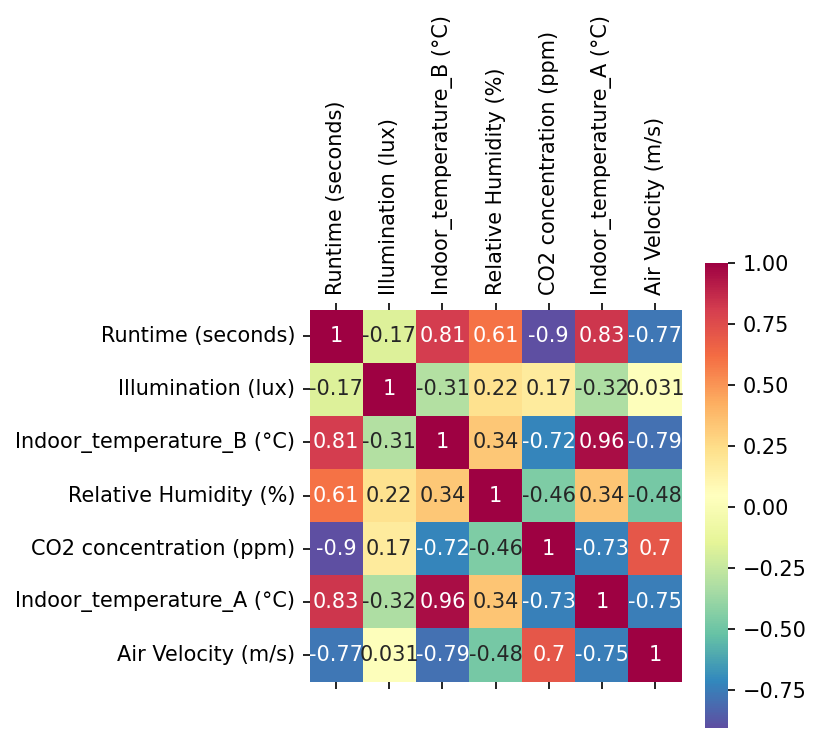

In [35]:
# Compute the correlation matrix
plt.matshow(df.corr())
dataplot = sns.heatmap(df.corr(), cmap="Spectral_r", annot=True)
plt.show()

<div class = "alert alert-block alert-info"> <b> INFERENCES: The correlation matrix show quantified relation values between the variables.<br> Some interesting relations are identified: <br>Strong negative relation between CO2 concentration and Indoor temperatures. <br> 0.7 relation between air velocity and CO2 concentration. <br> Illumination aginst variables like temperatutre and CO2 concentration show highly values, but as they are not directly related, they can be seen as non causer relations.  <b/> </div>

### Pair plots: Seaborn 
Plots for all variables against each other

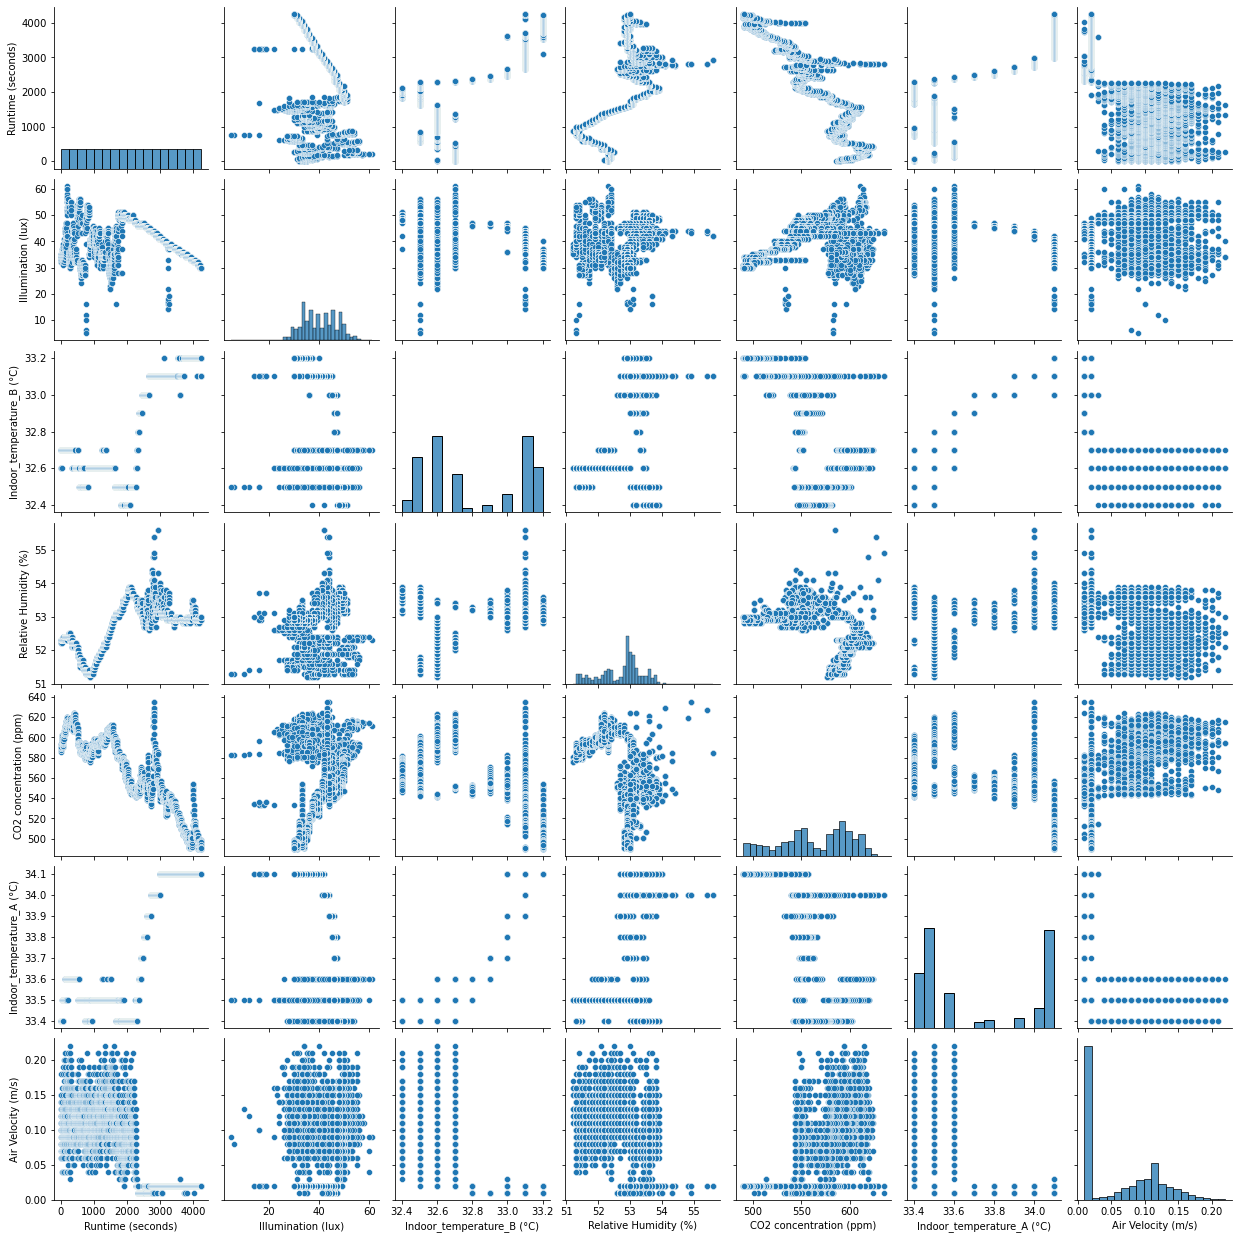

In [26]:
sns.pairplot(df)
plt.show()

<div class = "alert alert-block alert-info"> <b> INFERENCES: The correlation matrix and Pair plots overlapped and compared: The 1 value relation plots are pure bar plots and linearly related. The values lesser then 0.5 are not linearly related and give highly distorted sactter plot as well as highly flutuated disturbed curve graphs.<b/> </div>

## Discussion 



The indoor environment we live in is meant to be safe and comfortable so life suuporting activities can be carried out. Humans have struggled perfecting the insides and in the course of it we have experimented in various ways to achieve the best suit. Simulation is necessary to achieve the desired measurements to analyze and achieve design values corresponding the actual values obtained. <br>
Indoor environment quality (IEQ) consists of thermal comfort as one the main head. There exist further contributing factors effecting thermal comfort like: Environmental factors. <br>
This US 611 lab exercise was all about measuring these factors and analysing the so obtained data in Python. 
<br>
The methodology as mentioned earlier consisted on instrumentation and data collection. The environmental monitoring system. The results obtained were exported as excel and imported to python for Data analysis. 
<br>
The Analysis consisted of majorly following steps: Plotting time series ,maps for each varible and scatter plots and pair plots for all varibles against each other. 
the process has given great visual understanding of the variables. Obtained quantitaive and qualitative results. <br> Coprrelation results have given rise to reations unexpected in reality showing possibility of non causer relations. 
<br> Overall this process can be of great applications for simulation in any condition and any place. Hence high accurate results and analysis can lead to perfect design values and efficient interventions. 



*Thank you*
 